### Análise Bivariada

**Objetivos**
- Analisar as variávies com relação a resposta
- Interpretar o comportamento dos dados
- Avaliar a correlação e associação das variáveis com relação a resposta

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats.contingency import association
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv("data/telco_dataset.csv")

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### Criando Funções Auxiliares

In [4]:
def plt_percentages(feature, df):
    g = df.groupby(feature)["Churn"].value_counts().to_frame().reset_index()
    g["% clientes"] = g["count"]/len(df)
    plt.figure(figsize=(10, 4.5))
    ax = sns.barplot(x=feature, y= "% clientes", hue='Churn', data=g, palette="PuBu")
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    ax.plot()

In [5]:
def cramer_v(asssociation_cols, df):
    for j in asssociation_cols:
        result = association(pd.crosstab(df[j], df['Churn']), method="cramer")
        print(f'{j} :',result)

### Análise das Variáveis Categóricas

Cramer V
- gl=1 : irrisório < 0.1 < 0.3 < 0.5 < forte
- gl=2 : irrisório < 0.07 < 0.21 < 0.35 < forte
- gl=3 : irrisório < 0.06 < 0.17 < 0.29 < forte

#### Gender & SeniorCitizen

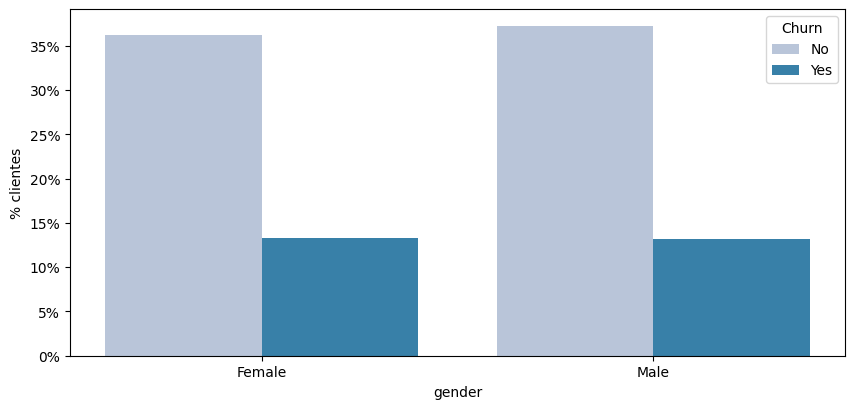

In [6]:
plt_percentages("gender", df)

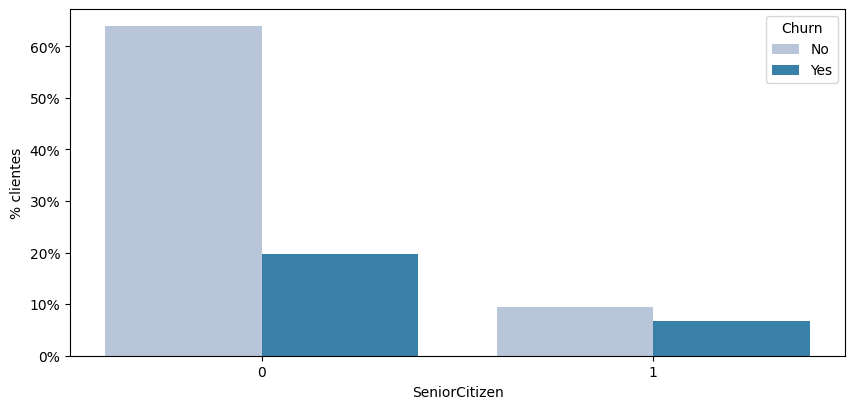

In [7]:
plt_percentages("SeniorCitizen", df)

In [8]:
cramer_v(['SeniorCitizen', 'gender'], df)

SeniorCitizen : 0.1508893281764731
gender : 0.008612095078997826


#### Partners & Dependents

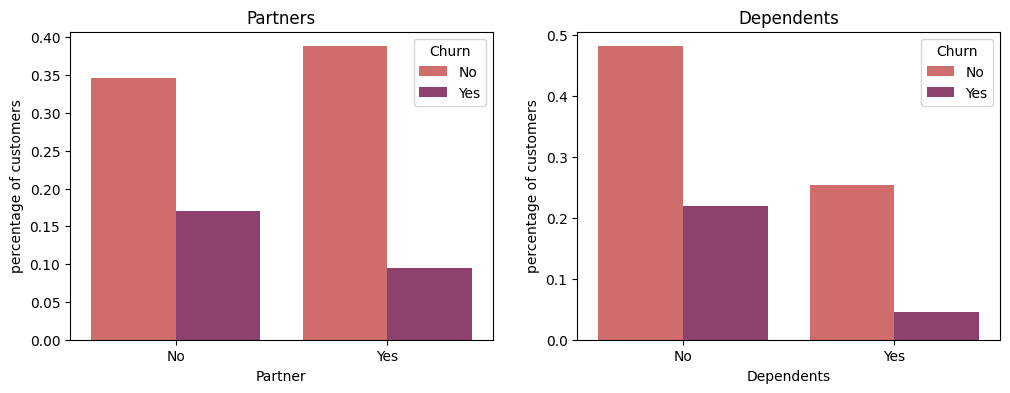

In [9]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Partners")
axis[1].set_title("Dependents")
axis_y = "percentage of customers"

# Partner
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().reset_index().rename(columns={"count": axis_y})
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0], palette = "flare")

# Dependents
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().reset_index().rename(columns={"count": axis_y})
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1], palette = "flare")

In [10]:
cramer_v(['Dependents', 'Partner'], df)

Dependents : 0.16422140157972526
Partner : 0.15044754495917653


#### Telefone e Serviços de Internet

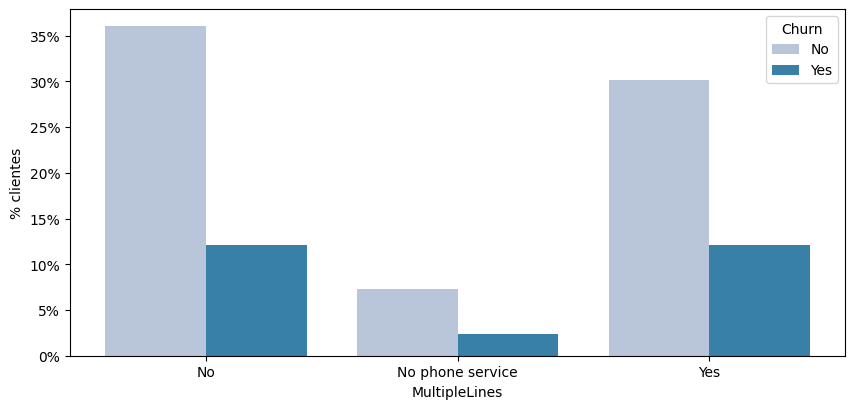

In [11]:
plt_percentages("MultipleLines", df)

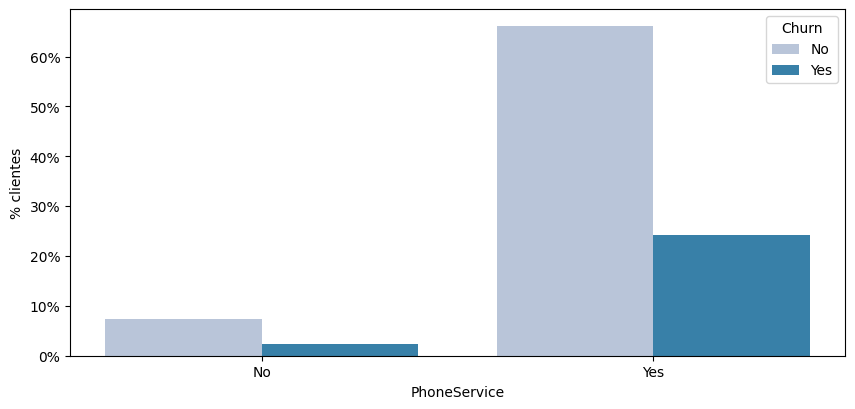

In [12]:
plt_percentages("PhoneService", df)

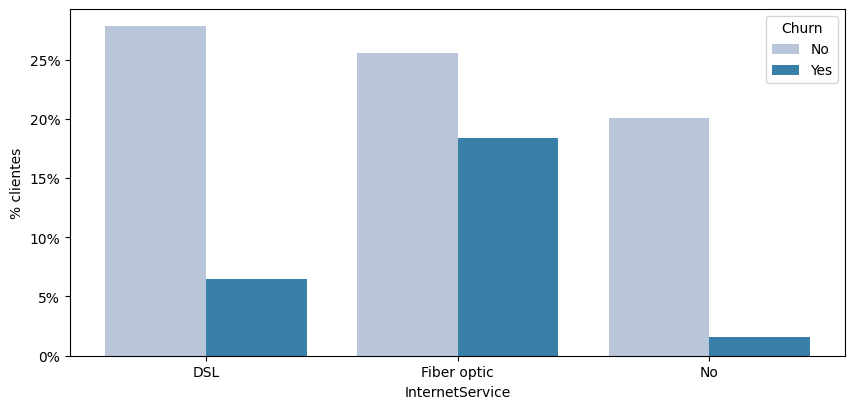

In [13]:
plt_percentages("InternetService", df)

In [14]:
cramer_v(['InternetService', 'PhoneService', 'MultipleLines'], df)

InternetService : 0.32245455521230887
PhoneService : 0.011941980029003072
MultipleLines : 0.04010925283378871


#### Serviços adicionais de Internet

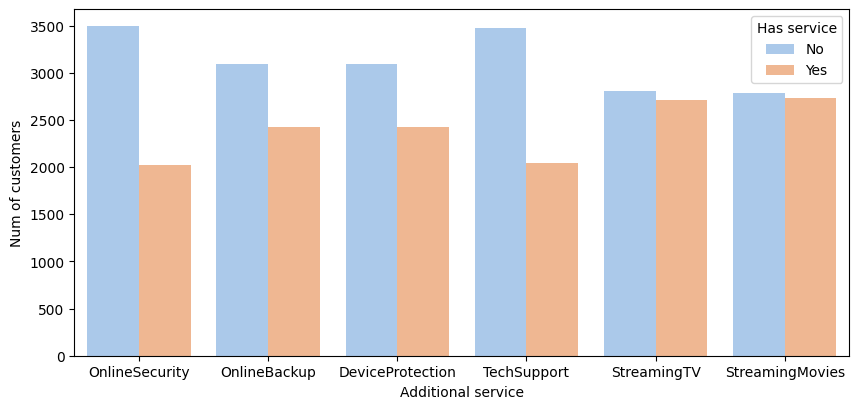

In [15]:
plt.figure(figsize=(10, 4.5))

cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', palette="pastel")
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

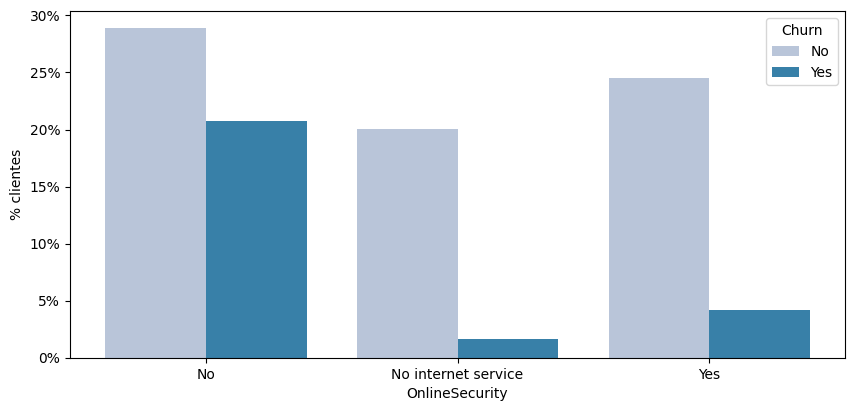

In [16]:
plt_percentages("OnlineSecurity", df)

In [17]:
cramer_v(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], df)

OnlineSecurity : 0.3474004326740552
OnlineBackup : 0.2923155121954445
DeviceProtection : 0.281579732968073
TechSupport : 0.3429161982469257
StreamingTV : 0.2305023384466809
StreamingMovies : 0.23095080906926801


#### Contrato e Pagamento

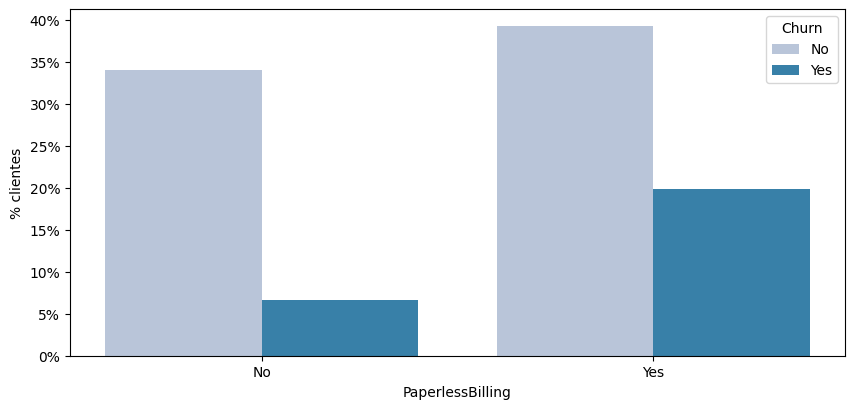

In [18]:
plt_percentages("PaperlessBilling", df)

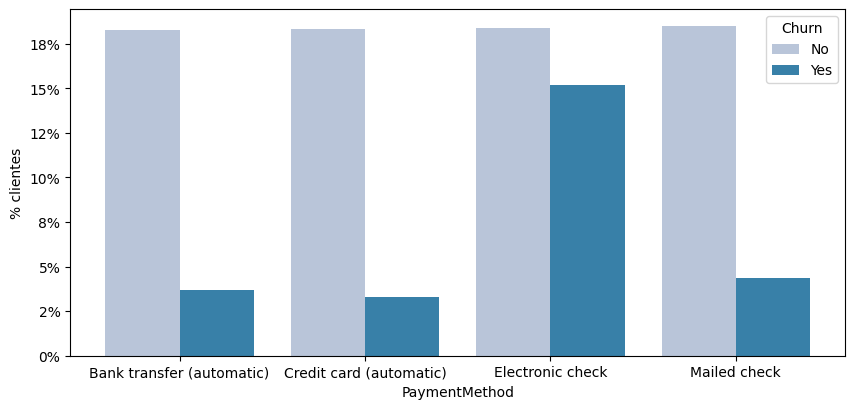

In [19]:
plt_percentages("PaymentMethod", df)

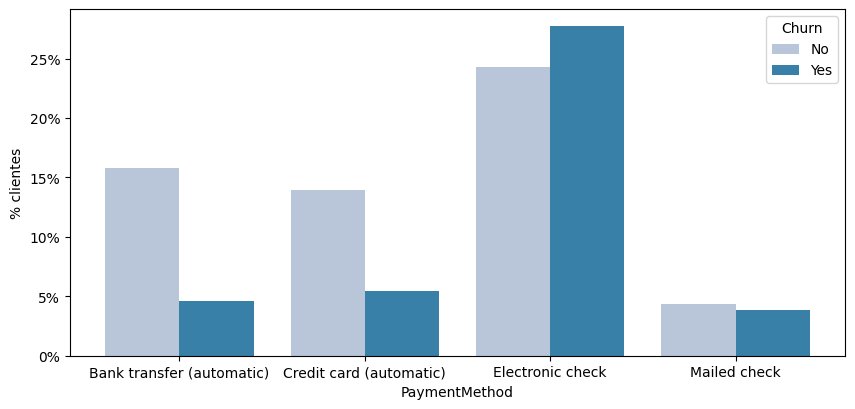

In [20]:
plt_percentages("PaymentMethod", df[df['SeniorCitizen'] == 1])

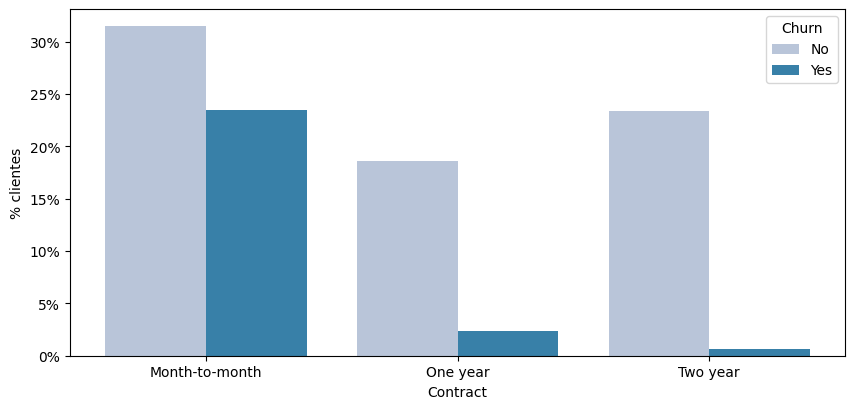

In [21]:
plt_percentages("Contract", df)

In [22]:
cramer_v(["PaperlessBilling", "PaymentMethod", "Contract"], df)

PaperlessBilling : 0.1918253316664679
PaymentMethod : 0.30335862555407056
Contract : 0.4101156965761409


### Análise das Variáveis Numéricas

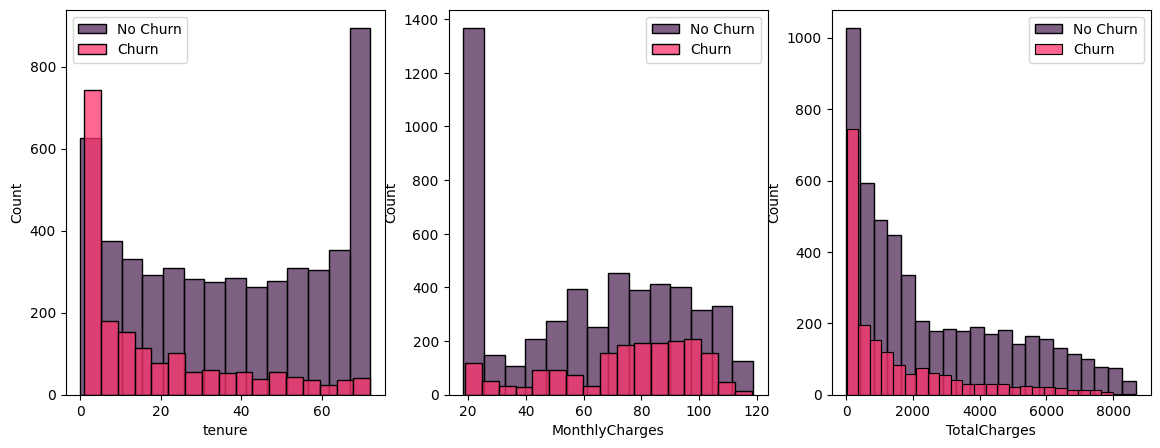

In [23]:
# Uma outra forma de ver a distribuição. Desta vez separando pela variável target
fig=plt.figure(figsize=(14, 5))
fig = plt.subplot(131)
sns.histplot(df[df['Churn'] == "No"]["tenure"],label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["tenure"],label='Churn', color='#fe346e')
plt.legend()

fig = plt.subplot(132)
sns.histplot(df[df['Churn'] == "No"]["MonthlyCharges"], label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["MonthlyCharges"], label='Churn', color='#fe346e') 
plt.legend()

fig = plt.subplot(133)
sns.histplot(df[df['Churn'] == "No"]["TotalCharges"], label='No Churn', color='#512b58') 
sns.histplot(df[df['Churn'] == "Yes"]["TotalCharges"], label='Churn', color='#fe346e') 
plt.legend()

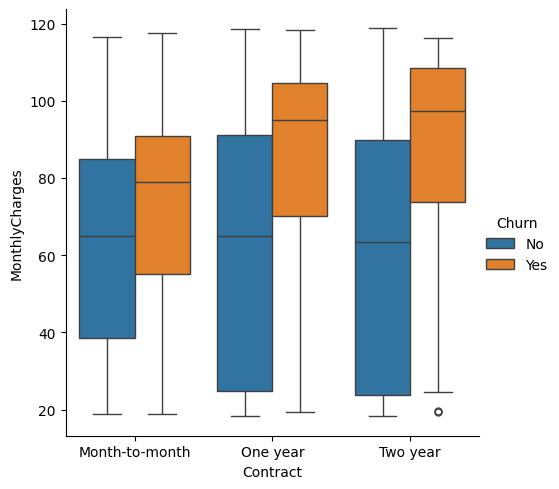

In [24]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df)

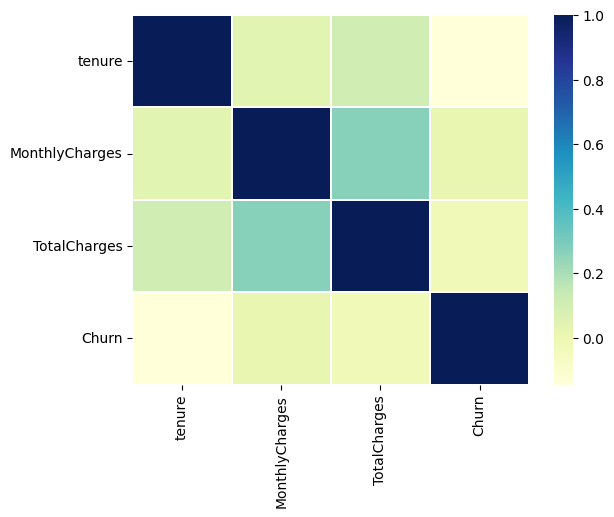

In [25]:
corr = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

Onde mora o perigo

In [26]:
cramer_v(["MonthlyCharges", "tenure", "TotalCharges"], df)

MonthlyCharges : 0.5491088555860031
tenure : 0.38892280467743456
TotalCharges : 0.9617155246525466


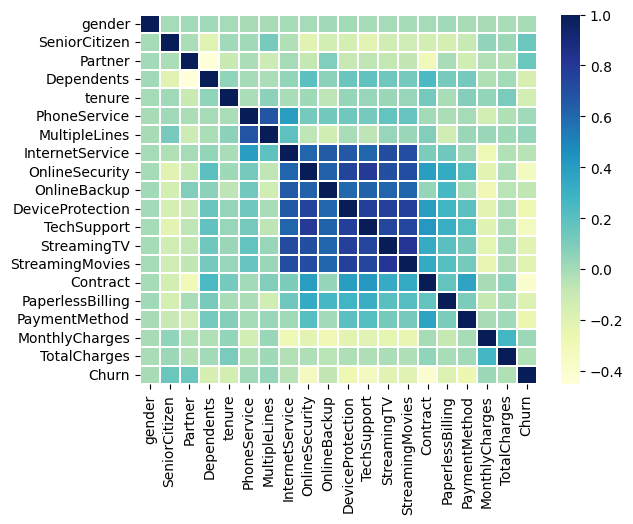

In [27]:
corr = df.drop(['customerID'],axis=1).apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")